In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("processed_data.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1. Price
#### Observations
1. Price columns seemed to be right skewed.
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(50% of the prices are below 10320, whereas the remaining 50% are between 10320 and 45,400.)

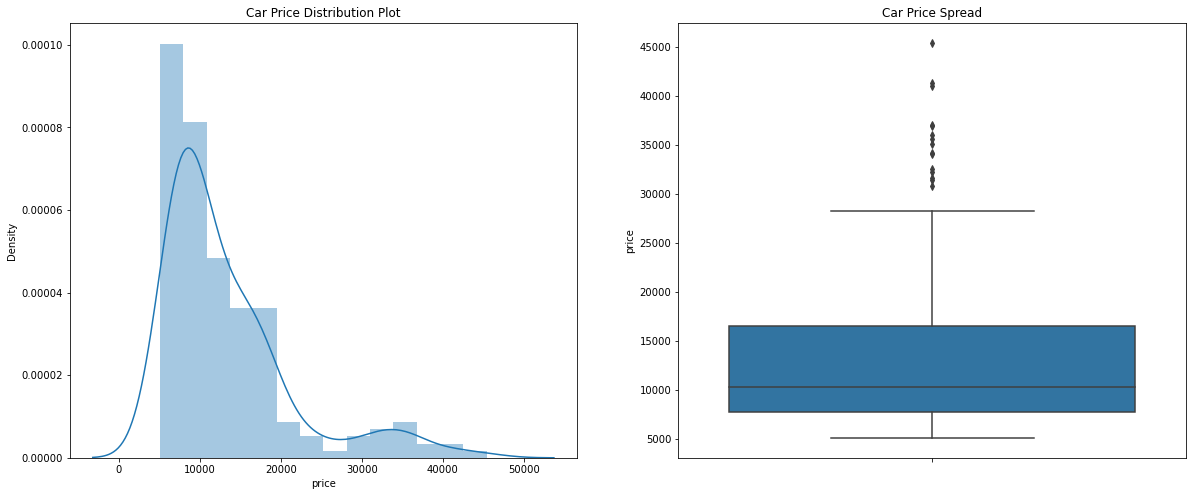

In [3]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [4]:
df.describe()["price"]

count      201.000000
mean     13278.834164
std       7995.743917
min       5118.000000
25%       7799.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

#### 2. CarName
1. maximum selling car in our dataset is toyota and minimum selling car is mercury.
2. gas fuel type is preferrd by maximum cars.
3. sedan carbody cars seems to be more sold.


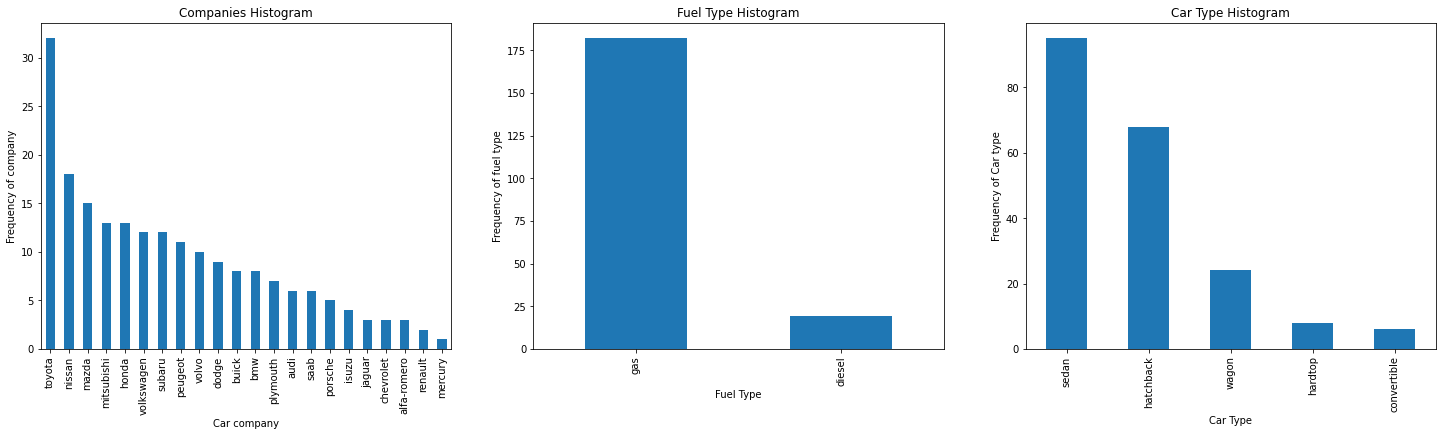

In [5]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CarName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

### 3. Symboling
#### Observations
1. Car with 0 and 1 symboling seems to be more sold
2. Car with -1 symboling seems to be highest priced

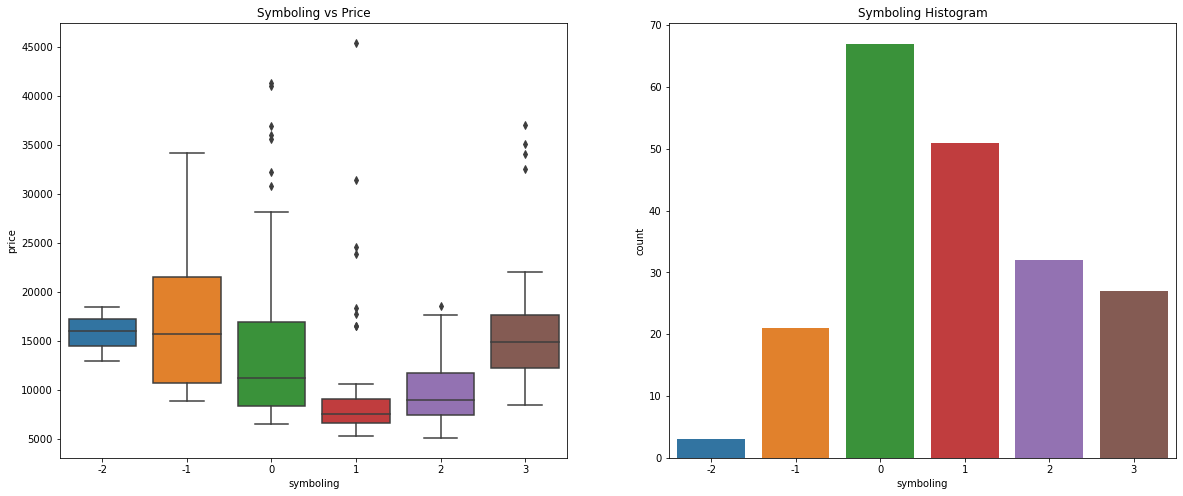

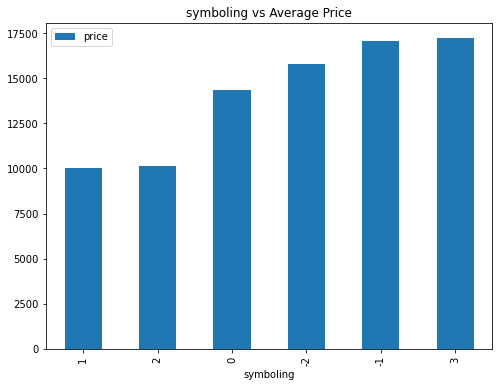

In [6]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,2)
plt.title('Symboling Histogram')
sns.countplot(df.symboling)

plt.subplot(1,2,1)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price)

plt.show()

symboling_price = pd.DataFrame(df.groupby(['symboling'])['price'].mean().sort_values(ascending = True))
symboling_price.plot.bar(figsize=(8,6))
plt.title('symboling vs Average Price')
plt.show()

### 4. Engine Type
#### Observation
1. ohc enginetype has maximum count in dataset, while dohcv has minimum.
2. dohcv enginetype has maximum price, while ohc has minimum.

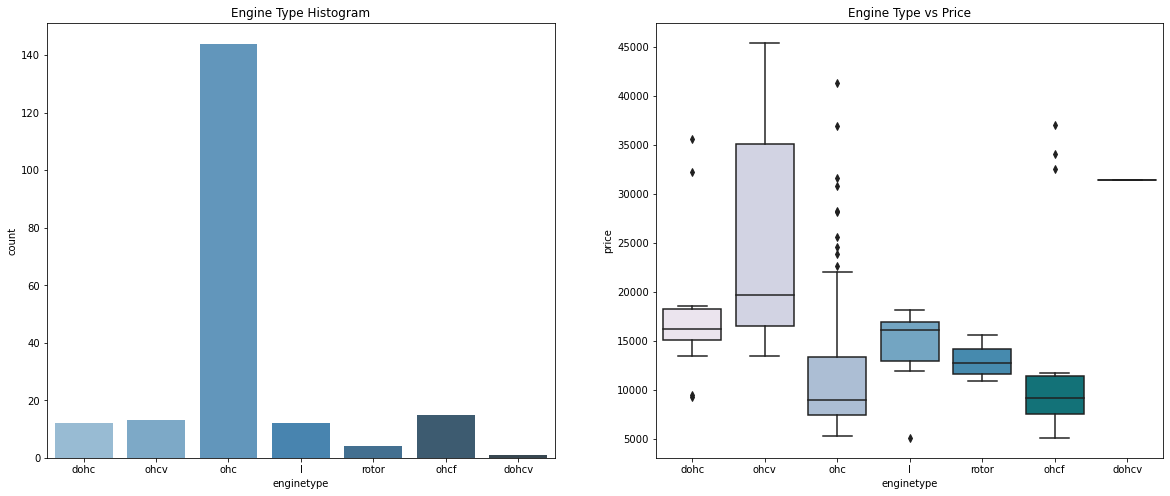

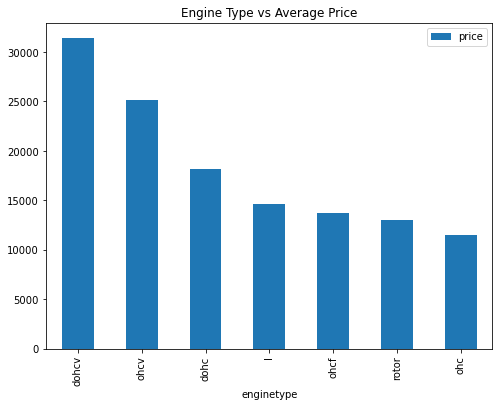

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

enginetype_price = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
enginetype_price.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

### 5. CarName
#### Observation
1. jaguar car has maximum selling price, while chevrolet has minimum.
2. diesel fuel type has maximum average price.
3. average price for hardtop carbody is maximum, while hatchback has minimum avergae price.

<Figure size 1800x432 with 0 Axes>

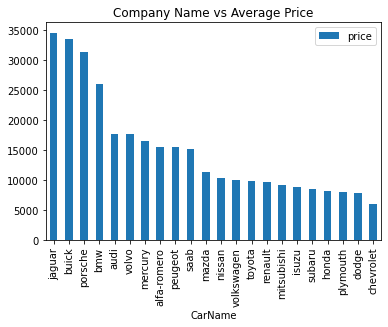

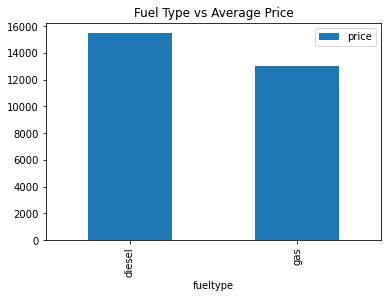

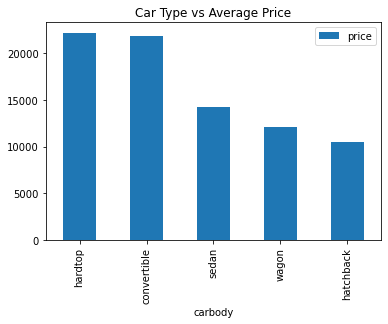

In [8]:
plt.figure(figsize=(25, 6))

CarName_price = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
CarName_price.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

fueltype_price = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
fueltype_price.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

carbody_price = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
carbody_price.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### 6.DoorNumber
#### Observation
1. four door number cars have maximum count.
2. four door number cars have maximum price.

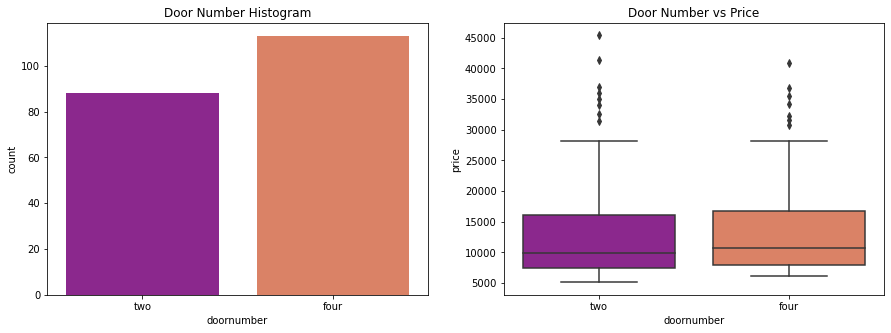

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

### 7. Aspiration
#### Observation
1. std aspiration cars have maximum count.
2. turbo aspiration cars are expensive than std aspiration.

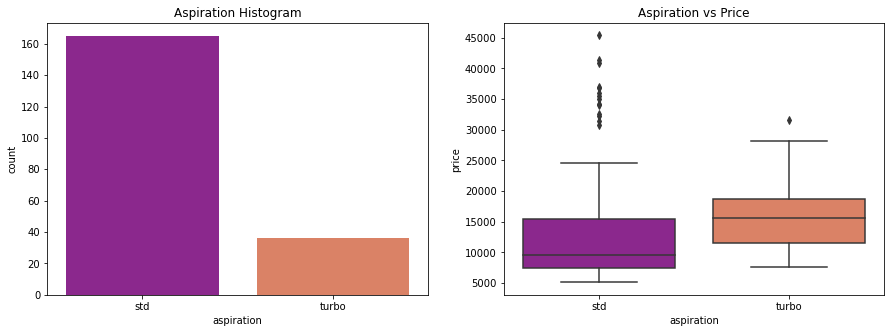

In [10]:
## do same as door number
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

### 8. Highwaympg 
#### Observation
1.fueleconomy has an obvios negative correlation with price and is significant.

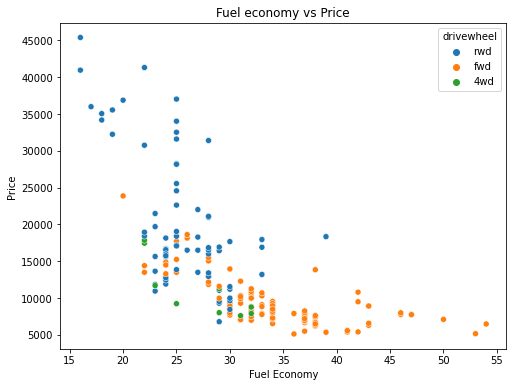

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['highwaympg'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

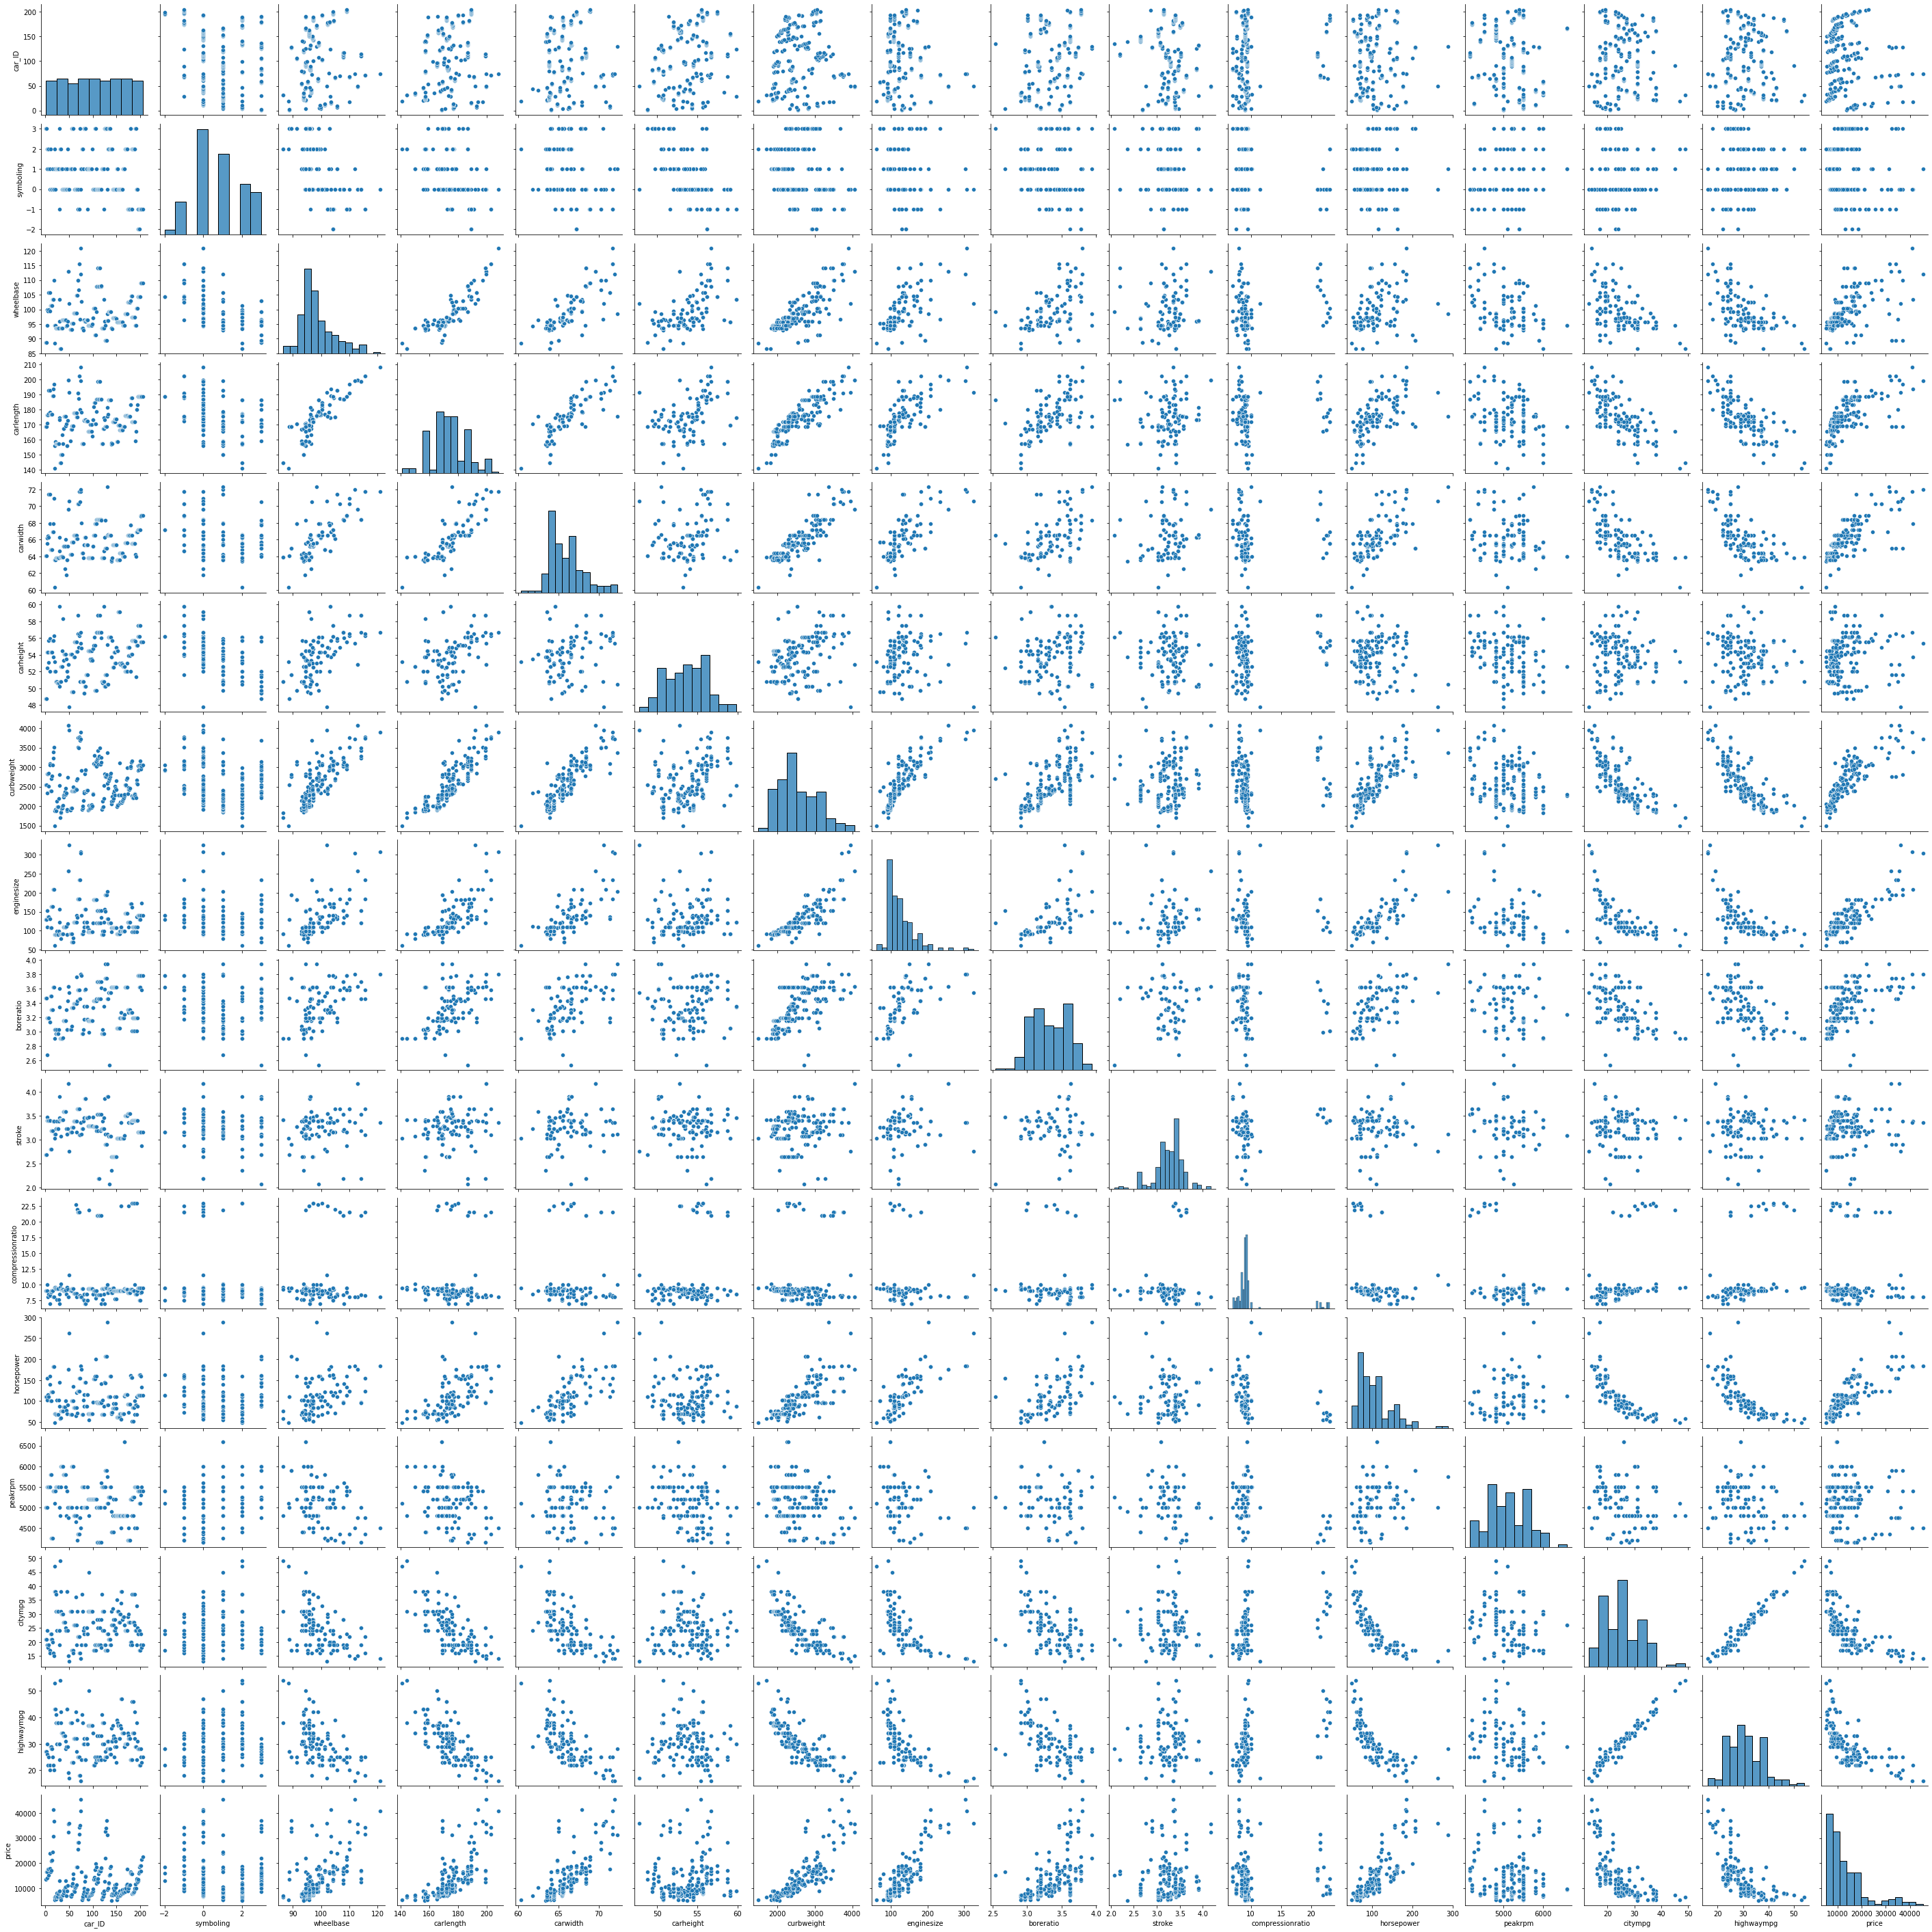

In [12]:
sns.pairplot(df)

<AxesSubplot:>

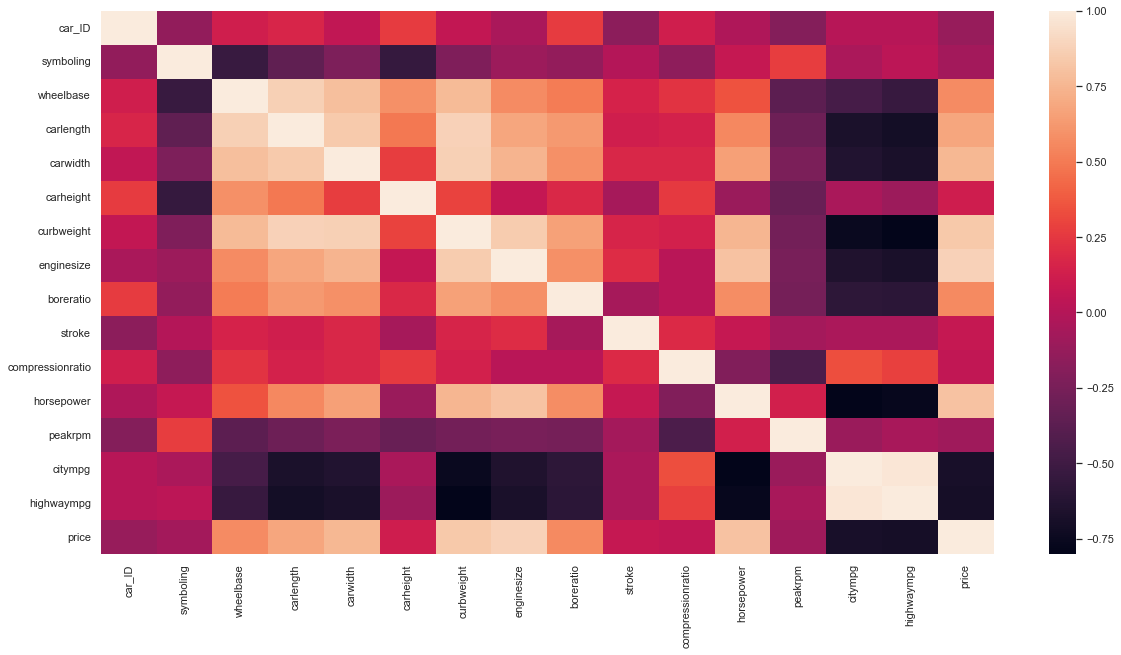

In [13]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr())

## how to plot percentage correlation on heatmap